## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sb
import pywt

#### 데이터 형태 살펴보기

In [2]:
tempdt = pd.read_csv('./SpotWeldingData_MultiClass/Abnormal1_1', sep = ',', header=None)
tempdt

,0,1,2
0,-0.093736,0.015897,0.003712
1,-0.101234,-0.017669,0.002989
2,-0.101609,-0.002913,0.002528
3,-0.119606,-0.005462,0.003551
4,-0.088862,-0.022791,0.001178
...,...,...,...
2769,-0.173220,-0.001180,0.010075
2770,-0.207714,-0.001008,0.010033
2771,-0.245207,-0.000644,0.010075
2772,-0.277826,-0.006294,0.009846


## 1. 특징 추출 (Time, Freq Domain)

### 데이터 크기 정의하기

In [3]:
NoOfData    = 180  # 정상/고장1/고장2 데이터 각 180개씩 
NoOfSensor  = 3    # 가속도(Acceleration), 전압(Voltage), 전류(Current)
NoOfFeature = 10   # 특징 개수:10개 (순서: Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Shape factor, Impulse factor)

NoOfData, NoOfSensor, NoOfFeature

(180, 3, 10)

In [4]:
def rms(x): # RMS 함수 정의
    return np.sqrt(np.mean(x**2))

In [5]:
# Time domain
TimeFeature_Normal    = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal1 = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
TimeFeature_Abnormal2 = np.zeros((NoOfSensor*NoOfFeature , NoOfData))

for i in range(NoOfData):
    
    # 데이터 불러오기
    temp_path1 = './SpotWeldingData_MultiClass/Normal_%d'%(i+1)    # Normal 데이터 파일 경로
    temp_path2 = './SpotWeldingData_MultiClass/Abnormal1_%d'%(i+1) # Abnormal1 데이터 파일 경로
    temp_path3 = './SpotWeldingData_MultiClass/Abnormal2_%d'%(i+1) # Abnormal2 데이터 파일 경로
    temp_data1 = np.array(pd.read_csv(temp_path1 , sep=',' , header=None)) # 임시 Normal 데이터
    temp_data2 = np.array(pd.read_csv(temp_path2 , sep=',' , header=None)) # 임시 Abnormal1 데이터
    temp_data3 = np.array(pd.read_csv(temp_path3 , sep=',' , header=None)) # 임시 Abnormal2 데이터
    
    # Time Domain 특징값 추출
    for j in range(NoOfSensor):
        
        # Normal Time Domain Feature
        TimeFeature_Normal[NoOfFeature*j+0, i] = np.max(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+1, i] = np.min(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+2, i] = np.mean(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+3, i] = rms(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+4, i] = np.var(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+5, i] = sp.skew(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+6, i] = sp.kurtosis(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+7, i] = np.max(temp_data1[:,j])/rms(temp_data1[:,j])
        TimeFeature_Normal[NoOfFeature*j+8, i] = rms(temp_data1[:,j])/np.mean(np.abs(temp_data1[:,j]))
        TimeFeature_Normal[NoOfFeature*j+9, i] = np.max(temp_data1[:,j])/np.mean(np.abs(temp_data1[:,j]))
        
        # Abnormal1 Time Domain Feature
        TimeFeature_Abnormal1[NoOfFeature*j+0, i] = np.max(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+1, i] = np.min(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+2, i] = np.mean(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+3, i] = rms(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+4, i] = np.var(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+5, i] = sp.skew(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+6, i] = sp.kurtosis(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+7, i] = np.max(temp_data2[:,j])/rms(temp_data2[:,j])
        TimeFeature_Abnormal1[NoOfFeature*j+8, i] = rms(temp_data2[:,j])/np.mean(np.abs(temp_data2[:,j]))
        TimeFeature_Abnormal1[NoOfFeature*j+9, i] = np.max(temp_data2[:,j])/np.mean(np.abs(temp_data2[:,j]))
        
        # Abnormal2 Time Domain Feature
        TimeFeature_Abnormal2[NoOfFeature*j+0, i] = np.max(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+1, i] = np.min(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+2, i] = np.mean(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+3, i] = rms(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+4, i] = np.var(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+5, i] = sp.skew(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+6, i] = sp.kurtosis(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+7, i] = np.max(temp_data3[:,j])/rms(temp_data3[:,j])
        TimeFeature_Abnormal2[NoOfFeature*j+8, i] = rms(temp_data3[:,j])/np.mean(np.abs(temp_data3[:,j]))
        TimeFeature_Abnormal2[NoOfFeature*j+9, i] = np.max(temp_data3[:,j])/np.mean(np.abs(temp_data3[:,j]))
        
print(TimeFeature_Normal.shape, TimeFeature_Abnormal1.shape, TimeFeature_Abnormal2.shape)

(30, 180) (30, 180) (30, 180)


In [14]:
# Frequency domain
# Wavelet options
MotherWavelet = pywt.Wavelet('haar')   # Mother wavelet (모함수) 지정
Level   = 8                            # Wavelet 분해 레벨 지정
select  = 8                            # 특징추출 영역 고주파 영역부터 개수 지정 (d1~)

#Frequency Domain 특징값 추출 (Wavelet Transform 기반)
FreqFeature_Normal    = np.zeros(shape=(NoOfSensor*NoOfFeature*select , NoOfData))
FreqFeature_Abnormal1 = np.zeros(shape=(NoOfSensor*NoOfFeature*select , NoOfData))
FreqFeature_Abnormal2 = np.zeros(shape=(NoOfSensor*NoOfFeature*select , NoOfData))

for i in range(NoOfData):
    
    # 데이터 불러오기
    temp_path1 = './SpotWeldingData_MultiClass/Normal_%d'%(i+1)   # Normal 데이터 파일 경로
    temp_path2 = './SpotWeldingData_MultiClass/Abnormal1_%d'%(i+1) # Abnormal1 데이터 파일 경로
    temp_path3 = './SpotWeldingData_MultiClass/Abnormal2_%d'%(i+1) # Abnormal2 데이터 파일 경로
    temp_data1 = np.array(pd.read_csv(temp_path1 , sep=',', header=None)) # 임시 Normal 데이터
    temp_data2 = np.array(pd.read_csv(temp_path2 , sep=',', header=None)) # 임시 Abnormal1 데이터
    temp_data3 = np.array(pd.read_csv(temp_path3 , sep=',', header=None)) # 임시 Abnormal2 데이터
    Coef1      = pywt.wavedec(temp_data1, MotherWavelet, level=Level, axis=0)
    Coef2      = pywt.wavedec(temp_data2, MotherWavelet, level=Level, axis=0)
    Coef3      = pywt.wavedec(temp_data3, MotherWavelet, level=Level, axis=0)
    
    # Frequency Domain 특징값 추출
    for j in range(NoOfSensor):
        
        for k in np.arange(select):
            coef1 = Coef1[Level-k]
            coef2 = Coef2[Level-k]
            coef3 = Coef3[Level-k]
            
            # Normal Frequency Domain Feature
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+0 , i] = np.max(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+1 , i] = np.min(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+2 , i] = np.mean(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+3 , i] = rms(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+4 , i] = np.var(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+5 , i] = sp.skew(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+6 , i] = sp.kurtosis(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+7 , i] = np.max(coef1[:,j])/rms(coef1[:,j])
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+8 , i] = rms(coef1[:,j])/np.mean(np.abs(coef1[:,j]))
            FreqFeature_Normal[NoOfFeature*j*select+k*NoOfFeature+9 , i] = np.max(coef1[:,j])/np.mean(np.abs(coef1[:,j]))
            
            # Abnormal1 Frequency Domain Feature
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+0 , i] = np.max(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+1 , i] = np.min(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+2 , i] = np.mean(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+3 , i] = rms(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+4 , i] = np.var(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+5 , i] = sp.skew(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+6 , i] = sp.kurtosis(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+7 , i] = np.max(coef2[:,j])/rms(coef2[:,j])
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+8 , i] = rms(coef2[:,j])/np.mean(np.abs(coef2[:,j]))
            FreqFeature_Abnormal1[NoOfFeature*j*select+k*NoOfFeature+9 , i] = np.max(coef2[:,j])/np.mean(np.abs(coef2[:,j]))
            
            # Abnormal2 Frequency Domain Feature
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+0 , i] = np.max(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+1 , i] = np.min(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+2 , i] = np.mean(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+3 , i] = rms(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+4 , i] = np.var(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+5 , i] = sp.skew(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+6 , i] = sp.kurtosis(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+7 , i] = np.max(coef3[:,j])/rms(coef3[:,j])
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+8 , i] = rms(coef3[:,j])/np.mean(np.abs(coef3[:,j]))
            FreqFeature_Abnormal2[NoOfFeature*j*select+k*NoOfFeature+9 , i] = np.max(coef3[:,j])/np.mean(np.abs(coef3[:,j]))

print(FreqFeature_Normal.shape, FreqFeature_Abnormal1.shape, FreqFeature_Abnormal2.shape) #웨이블렛 8 특징 10개 센서 3개라 240

(240, 180) (240, 180) (240, 180)


In [15]:
# 3개 Class 특징 병합
TimeFeature = np.concatenate([TimeFeature_Normal, TimeFeature_Abnormal1, TimeFeature_Abnormal2] , axis=1)
FreqFeature = np.concatenate([FreqFeature_Normal, FreqFeature_Abnormal1, FreqFeature_Abnormal2] , axis=1)
MC_Features = np.concatenate([TimeFeature,FreqFeature] , axis=0)
print("Feature Data Size :", MC_Features.shape)
print("= 데이터 %d개(정상/고장1/고장2 각 %d개씩)가 각각 %d개의 특징값으로 구성됨"%(MC_Features.shape[1], MC_Features.shape[1]/3, MC_Features.shape[0]))

# 추출한 특징 저장
MC_FeatureData = pd.DataFrame(MC_Features)
path = './ProcessedData/MC_FeatureData'   # path = '파일 경로/저장할 파일 이름'
MC_FeatureData.to_csv(path, sep=',', header=None , index=None)

Feature Data Size : (270, 540)
= 데이터 540개(정상/고장1/고장2 각 180개씩)가 각각 270개의 특징값으로 구성됨


.

.

.

## 2. 특징 선택을 위한 ANOVA & t-Test 수행

### >>> 2.1 다진 분류용 구분성 상위 특징 선택: ANOVA 기반 ( ExerciseCode_MultiClass (2) )
#### >>>>>>>> 3진분류 모델 1개, 선택할 구분성 상위 특징 종류도 1개

In [16]:
MC_FeatureData = pd.read_csv('./ProcessedData/MC_FeatureData', sep=',', header=None)

# 특징 데이터 정상/고장1/고장2 분리
NoOfData = int(MC_FeatureData.shape[1]/3)
Normal_FeatureData    = MC_FeatureData.iloc[ : ,            :   NoOfData ] #열의 구성 180개 180개 180개 분리
Abnormal1_FeatureData = MC_FeatureData.iloc[ : ,   NoOfData : 2*NoOfData ]
Abnormal2_FeatureData = MC_FeatureData.iloc[ : , 2*NoOfData :            ]

print(Normal_FeatureData.shape, Abnormal1_FeatureData.shape, Abnormal2_FeatureData.shape)

(270, 180) (270, 180) (270, 180)


In [17]:
# P-value 계산
NoOfTotalFeature = MC_FeatureData.shape[0] # 추출된 Feature 갯수
MC_P_value = np.zeros((NoOfTotalFeature , 2))

# 특징값 각각  anova 수행
for i in np.arange(NoOfTotalFeature):
    
    ANOVA           = np.array(sp.f_oneway(Normal_FeatureData.iloc[i,:] , Abnormal1_FeatureData.iloc[i,:], Abnormal2_FeatureData.iloc[i,:]))
    MC_P_value[i,0] = i          # Feature Index    정상 1 
    MC_P_value[i,1] = ANOVA[1]   # P값 (P-value)
    
MC_P_value = pd.DataFrame(MC_P_value)
MC_P_value

,0,1
0,0.0,1.144272e-04
1,1.0,1.307924e-10
2,2.0,8.345941e-65
3,3.0,9.120815e-39
4,4.0,6.967778e-12
...,...,...
265,265.0,2.590341e-36
266,266.0,7.431031e-47
267,267.0,3.413499e-27
268,268.0,3.945970e-41


In [18]:
MC_P_value_Rank = MC_P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬
MC_P_value_Rank #위가 구분성이 높다

,0,1
213,213.0,3.013639e-219
214,214.0,5.757393e-219
193,193.0,7.861124e-216
194,194.0,3.286615e-215
180,180.0,2.066446e-203
...,...,...
62,62.0,4.320739e-01
135,135.0,5.840044e-01
52,52.0,7.274523e-01
42,42.0,7.474691e-01


In [19]:
# 특징값 종류 저장
path = './ProcessedData/MC_P_value_Rank_ANOVA'   # path = '파일 경로/저장할 파일 이름'
MC_P_value_Rank.to_csv(path, sep=',', header=None, index=None)

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

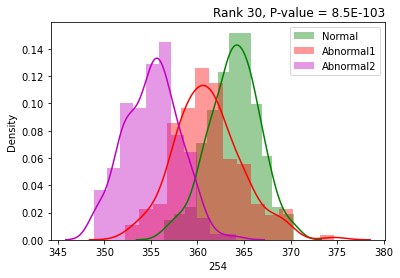

In [21]:
# PDF 확인
FeatureRank = 30 #2,3 ~30까지 확인
# PDF 그래프
sb.distplot(Normal_FeatureData.iloc[int(MC_P_value_Rank.iloc[FeatureRank-1,0])   ,:], label = 'Normal',    color = 'g')
sb.distplot(Abnormal1_FeatureData.iloc[int(MC_P_value_Rank.iloc[FeatureRank-1,0]),:], label = 'Abnormal1', color = 'r')
sb.distplot(Abnormal2_FeatureData.iloc[int(MC_P_value_Rank.iloc[FeatureRank-1,0]),:], label = 'Abnormal2', color = 'm')
plt.title('Rank {}, P-value = {:.1E}'.format(FeatureRank, MC_P_value_Rank.iloc[FeatureRank-1,1]), loc = 'right')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#모델 성능 향상 시키려면 abnormal2 먼저 구분하고 이후에 분류하는게 효율 up pvalue1퍼보다 작게하는 것이 좋다

### >>> 2.2 다중 2진 분류용 구분성 상위 특징 선택: t-Test 기반 ( ExerciseCode_MultiClass (3) )
#### >>>>>>>> 2진분류 모델 2개, 선택할 구분성 상위 특징 종류도 2개

In [22]:
# 전체 특징 데이터
MC_FeatureData = pd.read_csv('./ProcessedData/MC_FeatureData', sep=',', header=None)

In [23]:
# 특징 데이터 정상/고장(1,2) 분리 : for model 1 정상하고 고장만 분류
NoOfData = int(MC_FeatureData.shape[1]/3)
Normal_FeatureData   = MC_FeatureData.iloc[ : ,          : NoOfData ]
Abnormal_FeatureData = MC_FeatureData.iloc[ : , NoOfData :          ]

print(Normal_FeatureData.shape, Abnormal_FeatureData.shape)

(270, 180) (270, 360)


In [25]:
# P-value 계산
NoOfTotalFeature = MC_FeatureData.shape[0] # 추출된 Feature 갯수
MC_P_value_M1 = np.zeros((NoOfTotalFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfTotalFeature):
    
    T_test             = np.array(sp.ttest_ind(Normal_FeatureData.iloc[i,:] , Abnormal_FeatureData.iloc[i,:]))
    MC_P_value_M1[i,0] = i          # Feature Index
    MC_P_value_M1[i,1] = T_test[1]  # P값 (P-value)
    
MC_P_value_M1      = pd.DataFrame(MC_P_value_M1)
MC_P_value_Rank_M1 = MC_P_value_M1.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬
MC_P_value_Rank_M1

,0,1
180,180.0,2.984853e-191
170,170.0,6.190518e-144
83,83.0,4.072881e-126
81,81.0,7.321327e-122
178,178.0,8.550590e-116
...,...,...
62,62.0,8.212271e-01
85,85.0,8.486327e-01
202,202.0,8.499425e-01
42,42.0,8.646344e-01


In [26]:
# 특징 데이터 고장1/고장2 분리 : for model 2
NoOfData = int(Abnormal_FeatureData.shape[1]/2)
Abnormal1_FeatureData   = Abnormal_FeatureData.iloc[ : ,          : NoOfData ]
Abnormal2_FeatureData   = Abnormal_FeatureData.iloc[ : , NoOfData :          ]

print(Abnormal1_FeatureData.shape, Abnormal2_FeatureData.shape)

(270, 180) (270, 180)


In [27]:
# P-value 계산
NoOfTotalFeature = MC_FeatureData.shape[0] # 추출된 Feature 갯수
MC_P_value_M2 = np.zeros((NoOfTotalFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfTotalFeature):
    
    T_test             = np.array(sp.ttest_ind(Abnormal1_FeatureData.iloc[i,:] , Abnormal2_FeatureData.iloc[i,:]))
    MC_P_value_M2[i,0] = i          # Feature Index
    MC_P_value_M2[i,1] = T_test[1]  # P값 (P-value)
    
MC_P_value_M2      = pd.DataFrame(MC_P_value_M2)
MC_P_value_Rank_M2 = MC_P_value_M2.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬
MC_P_value_Rank_M2

,0,1
213,213.0,1.028658e-162
214,214.0,1.326028e-162
193,193.0,1.772056e-154
194,194.0,3.897829e-154
203,203.0,2.116918e-143
...,...,...
50,50.0,9.320462e-01
122,122.0,9.369083e-01
256,256.0,9.648864e-01
56,56.0,9.731784e-01


In [28]:
# 특징값 종류 저장
path1 = './ProcessedData/MC_P_value_Rank_M1'        # path = '파일 경로/저장할 파일 이름'
path2 = './ProcessedData/MC_P_value_Rank_M2'   # path = '파일 경로/저장할 파일 이름'
MC_P_value_Rank_M1.to_csv(path1, sep=',', header=None, index=None)
MC_P_value_Rank_M2.to_csv(path2, sep=',', header=None, index=None)